In [1]:
# conda install -c conda-forge textblob

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis

In [43]:
import pandas as pd

data = pd.read_pickle('data_clean.pkl')
# data

In [44]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
# data


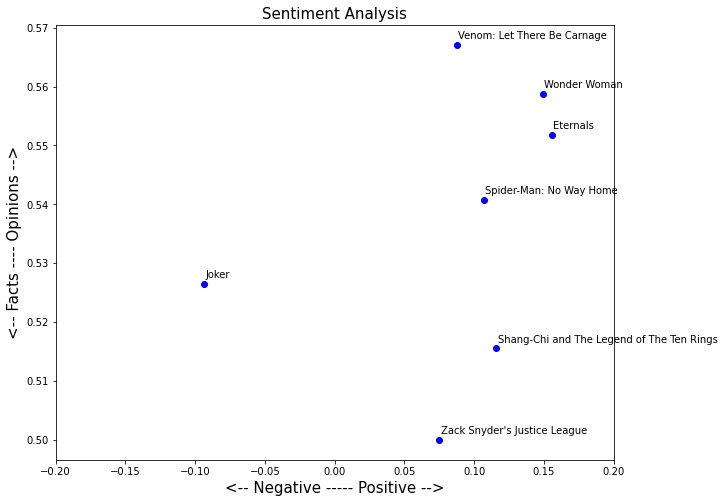

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x,y, color = 'blue')
    plt.xlim(-0.2, 0.2)
    plt.text(x + 0.001, y + 0.001, data['full_name'][index])
plt.title('Sentiment Analysis', fontsize = 15)
plt.xlabel('<-- Negative ----- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts ---- Opinions -->', fontsize = 15)
plt.show()

# Sentiment Over Time

In [15]:
import numpy as np
import math

In [23]:
def split_text(text, n=10):
    
    # melihat panjang text 
    length = len(text)
    # melihat ukuran masing2 bagian (dari 10 bagian)
    size = math.floor(length/n)
    # starting point di masing2 bagian
    start = np.arange(0, length, size)
    
    split_list=[]
    for bagian in range(n):
        split_list.append(text[start[bagian]:start[bagian]+size])
    return split_list
        

In [28]:
# membagi transkrip menjadi 10 bagian yg sama
# dilakukan pada masing-masing film
list_pieces =  []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces[2]

['  determined to ensure supermans ultimate sacrifice was not in vain bruce wayne aligns forces with diana prince with plans to recruit a team of metahumans to protect the world from an approaching threat of catastrophic proportions the task proves more difficult than bruce imagined as each of the recruits must face the demons of their own pasts to transcend that which has held them back allowing them to come together finally forming an unprecedented league of heroes now united batman wonder woman aquaman cyborg and the flash may be too late to save the planet from steppenwolf desaad and darkseid and their dreadful intentions     um but before you see justice league i wanted to say a huge thank you to all of the fans that made this possible your amazing and generous support for afsp your incredible passion for this vision that youre about to get a chance to see and that you made happen so on behalf of myself and debbie thank you so much and check it out its streaming now  electrical bu

In [29]:
# list pieces berisi masing-masing film
len(list_pieces)

7

In [32]:
# masing-masing film terbagi atas 10 bagian
len(list_pieces[2])

10

In [33]:
# menghitung polarity
polarity_transcript= []
for m in list_pieces:
    polarity_bagian = []
    for p in m:
        polarity_bagian.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_bagian)

polarity_transcript


[[0.159476602762317,
  0.1843693765384942,
  0.2270094325609031,
  0.24649190972961463,
  0.15434401619885488,
  0.11425714285714285,
  0.09795993056862617,
  0.09447263641708085,
  0.17895528950216444,
  0.11473623275948856],
 [0.05934343434343434,
  0.01717171717171717,
  -0.05476190476190477,
  0.19081632653061226,
  -0.2793650793650794,
  -0.08333333333333333,
  -0.055555555555555566,
  -0.4083333333333334,
  -0.3,
  0.08106060606060607],
 [0.02475256769374416,
  0.048480774923082594,
  0.09022976066079505,
  0.1581856155540366,
  0.1320709325396825,
  0.0387918391994479,
  0.038879077572259405,
  -0.0486946532999165,
  0.18466853913282485,
  0.10651221151221152],
 [0.17116103430619564,
  0.04091625286478227,
  0.11706508360920125,
  0.1407142857142857,
  0.08847846142928108,
  0.13094485495347563,
  0.10449575807334428,
  0.12396746482683983,
  0.05381161236424394,
  0.19104308390022676],
 [0.023554292929292932,
  0.20119065528639993,
  0.026858542691876024,
  0.05454672778202191,

<function matplotlib.pyplot.show(close=None, block=None)>

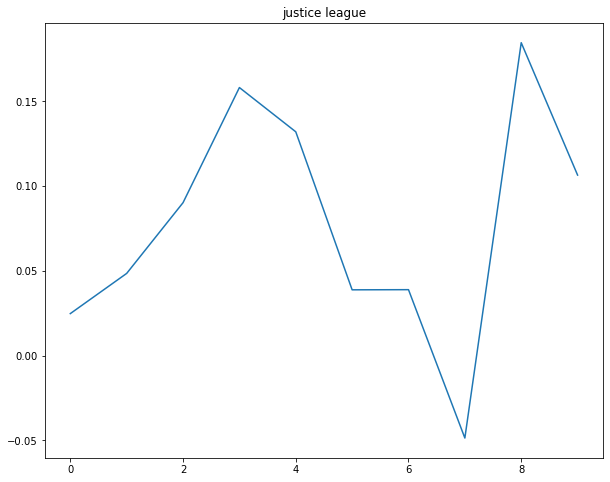

In [36]:
plt.plot(polarity_transcript[2])
plt.title(data['full_name'].index[2])
plt.show

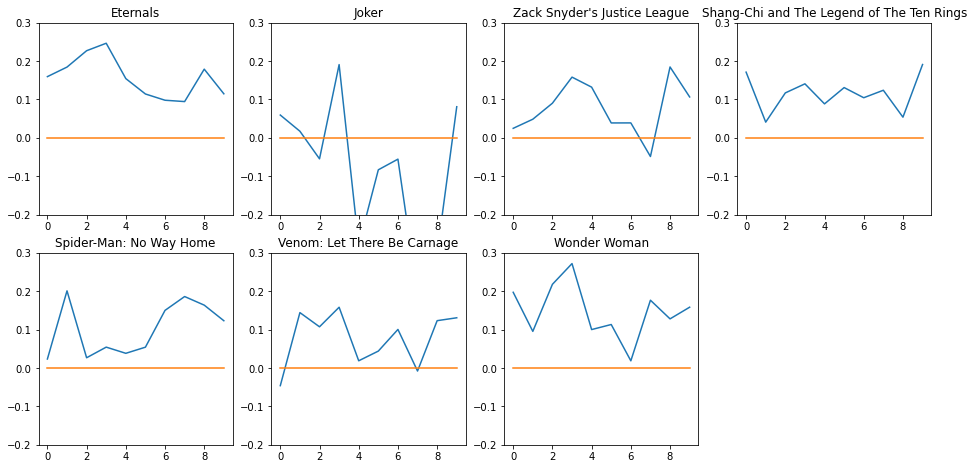

In [42]:
plt.rcParams['figure.figsize'] = [16,12]
for index, movie in enumerate(data.index):
    plt.subplot(3,4, index +1)
    plt.plot(polarity_transcript[index])
    plt.title(data['full_name'][index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.ylim(ymin = -.2, ymax = .3)
